제약 사항
*   제공한 라이브러리 사용
*   주석으로 코드 설명

참조 페이지

* https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

* https://matplotlib.org/stable/tutorials/introductory/images.html

* https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

* https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html

* https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345

* https://docs.opencv.org/3.4/dd/d53/tutorial_py_depthmap.html

사진 출처

* https://www.youtube.com/watch?v=xRiPFfDal14

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 1) 제공된 사진 2장을 불러오고 시각화하기

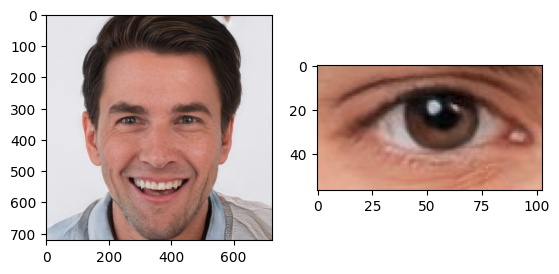

In [3]:
face_img = cv2.imread('./content/얼굴사진.png')
eye_img = cv2.imread('./content/눈사진.png')

# write your code here  
plt.figure() # plt 생성
plt.subplot(1, 2, 1) # 첫번째 plot 생성
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)) # BGR 형식을 RGB 형식으로 바꿔서 출력
plt.subplot(1, 2, 2)# 두번째 plot 생성
plt.imshow(cv2.cvtColor(eye_img, cv2.COLOR_BGR2RGB)) # BGR 형식을 RGB 형식으로 바꿔서 출력

plt.show()

## 2) 제공한 눈 사진을 template 삼아 얼굴사진에서 눈 좌표(top_left) 출력하기

In [4]:
# write your code here
def detect(image, template):
  res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) # template match
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) #최대, 최솟값 얻기
  return max_loc

g_face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY) # BGR에서 RGB로 변환
g_eye_img = cv2.cvtColor(eye_img, cv2.COLOR_BGR2GRAY) # BGR에서 RGB로 변환

point_left = detect(g_face_img, g_eye_img) #  왼쪽 눈 검출
point_right = detect(g_face_img, cv2.flip(g_eye_img, 1)) # 오른쪽 눈 검출

print("왼쪽 눈 위치: ", point_left)
print("오른쪽 눈 위치: ", point_right)

왼쪽 눈 위치:  (211, 318)
오른쪽 눈 위치:  (407, 315)


## 3) 제공된 얼굴사진에 눈 위치 사각형으로 표시하기(2개 전부)

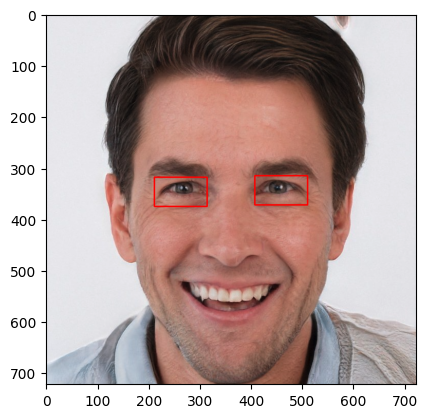

In [5]:
# write your code here
w, h = g_eye_img.shape[::-1] # 눈의 width, height 구하기

tmp_img = face_img.copy() # 이미지 불러오기
cv2.rectangle(tmp_img, point_left, (point_left[0] + w, point_left[1] + h), (0, 0, 255), 2) # 왼쪽 눈 빨간 사각형 그리기
cv2.rectangle(tmp_img, point_right, (point_right[0] + w, point_right[1] + h), (0, 0, 255), 2) # 오른쪽 눈 빨간 사각형 그리기

plt.figure() # plt renew
plt.imshow(cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)) # BGR->RGB변환하기 및 이미지 제공ㅍ

plt.show() # plt show

## 4) SIFT 서술자 추출기 생성, 각 사진에 대해 키 포인트와 서술자 추출

In [6]:
image_1 = cv2.imread('./content/3.png')
image_2 = cv2.imread('./content/4.png')
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
gray_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

In [7]:
# ORB 추출기 생성 
detector = cv2.ORB_create() # ORB Detector 생성


# 각 영상에 대해 키 포인트와 서술자 추출 
key_point1, desc1 = detector.detectAndCompute(gray_1, None) # 영상의 특징점 추출 및 계산
key_point2, desc2 = detector.detectAndCompute(gray_2, None) # 영상의 특징점 추출 및 계산

## 5) BFMatcher 생성, Hamming 거리 상호체크 후 매칭 계산

In [8]:
# BFMatcher 생성, Hamming 거리, 상호 체크 
matcher = cv2.BFMatcher() # brute-force matcher 생성


# 매칭 계산 
matches = matcher.knnMatch(desc1, desc2, k=2) # k매칭 결과 계산하고 이미지 추출

## 6) 매칭결과 그리기 

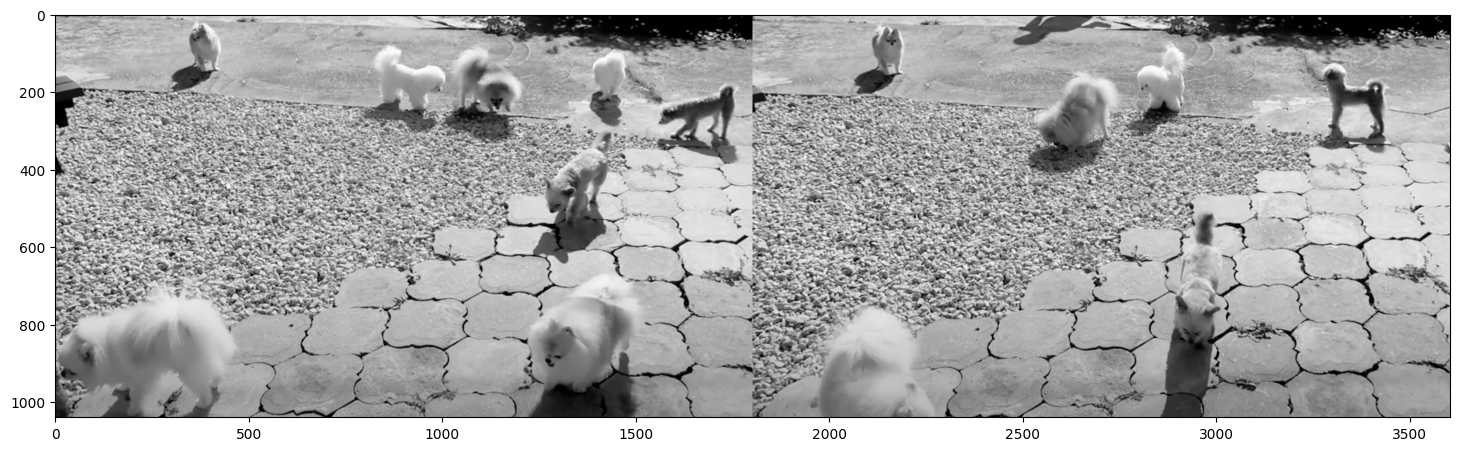

In [9]:

matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]


res = cv2.drawMatchesKnn(gray_1, key_point1, gray_2, key_point2, matches, None, flags=cv2.DrawMatchesFlags_DEFAULT) # 매칭결과 시각화하기

plt.figure(figsize=(18,18)) # plt renew and set config
plt.imshow(res) # draw image
plt.show() # show image

## 7) mean filter와 gaussian filter 적용하기

### 파일 불러오기

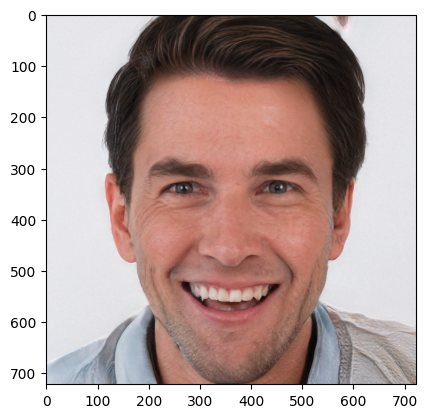

In [10]:
img = cv2.imread('./content/얼굴사진.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### gaussian filter 적용하기

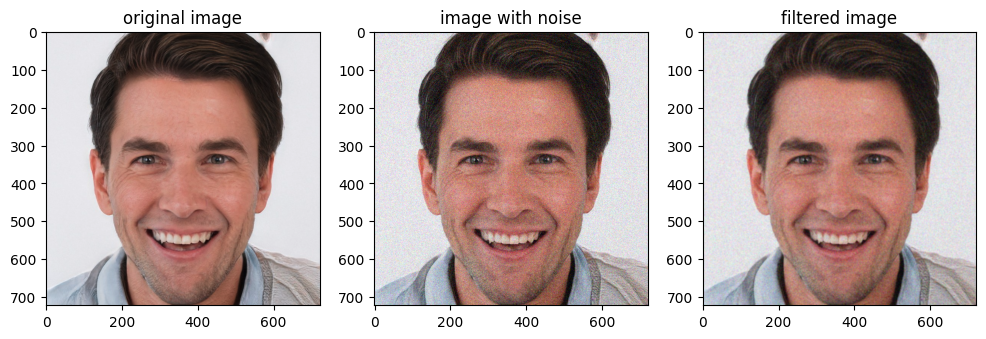

In [11]:
noise_img = img.copy()
noise_img = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')
# write your code
filtered_img = cv2.GaussianBlur(noise_img, (5, 5), 0)  #Gaussian 필터 이용해 흐릿하게 만들어주기


plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,3,2)
plt.title('image with noise')
plt.imshow(noise_img)
plt.subplot(1,3,3)
plt.title('filtered image')
plt.imshow(filtered_img)
plt.show()

### median filter 적용하기

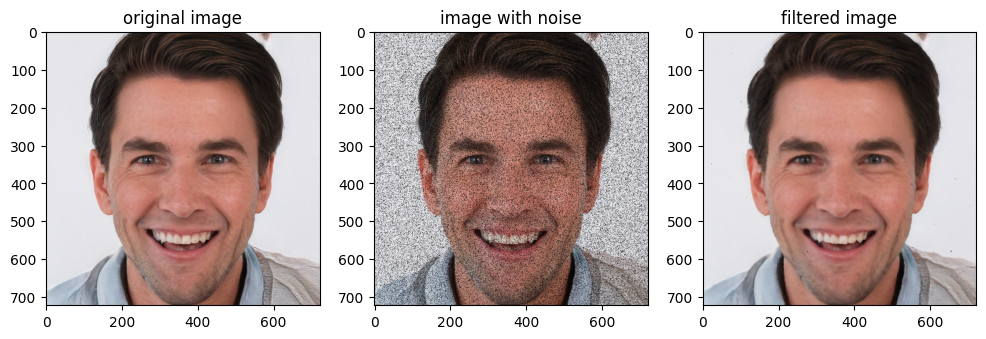

In [12]:
np.random.seed(42)
noise_img2 = img.copy()
N = 100000
x = np.random.randint(img.shape[0], size=N)
y = np.random.randint(img.shape[1], size=N)
noise_img2[x, y] = 0
# write your code
filtered_img2 = cv2.medianBlur(noise_img2, 5) #medianBlur 필터 이용해 흐릿하게 만들어주기


plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,3,2)
plt.title('image with noise')
plt.imshow(noise_img2)
plt.subplot(1,3,3)
plt.title('filtered image')
plt.imshow(filtered_img2)
plt.show()

## 8) Sobel filtering

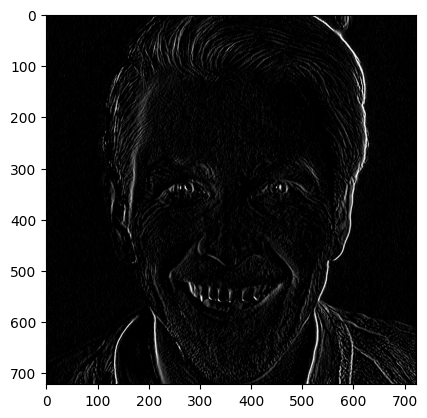

In [13]:
img = cv2.imread('./content/얼굴사진.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# write your code
sobel_img = cv2.Sobel(img, -1, 1, 0) #sobel필터를 이용해 기울기 계산
#gradient(수직, 수평) 계산해 대입

plt.imshow(sobel_img, cmap='gray')
plt.show()

## 9) feature extracting(cornerharris)

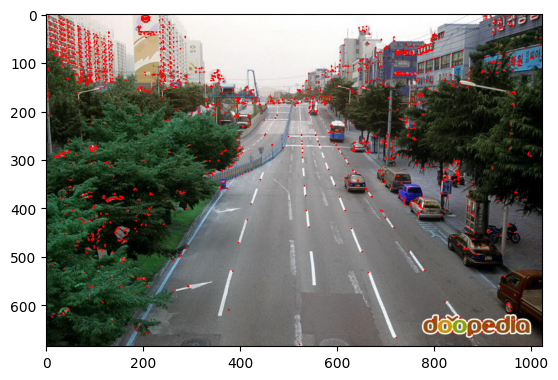

In [14]:
img = cv2.imread('./content/feature_extracting.jpeg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

# write your code
block_size = 2
ksize = 3
k = 0.15

dst = cv2.cornerHarris(gray_img, block_size, ksize, k) # 가장자리,코너 찾아 검출
dst = cv2.dilate(dst, None) # 검출된 부분드를 확대하기

img[dst > 0.01 * dst.max()] = [255, 0, 0] # dst에서 검출된 코너를 빨간색으로 표시

plt.imshow(img)
plt.show()

## 10) Depth Map from Stereo Images

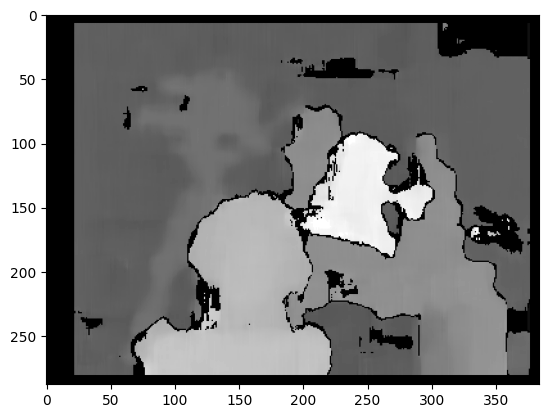

In [15]:
imgL = cv2.imread('./content/DM_left_image.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('./content/DM_right_image.png', cv2.IMREAD_GRAYSCALE)

# write your code
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
#numDisparities = 16, blockSize =15로 설정해 StereoBM객체를 생성 
disparity = stereo.compute(imgL,imgR)
# stereo depth map이 생성되어 두 이미지 간의 거리차이 계산
plt.imshow(disparity,'gray') #gray 이미지로 출력

plt.show()